# Working with data 2019
## Contact
Javier Garcia-Bernardo
garcia@uva.nl


## PLAN FOR THE WEEK
- MONDAY: Maps
- WEDNESDAY: Cleaning data 2 (missing data and outliers)
- FRIDAY: Statistics


## WEDNESDAY
- 1. Sample vs population
    - 1.1 Representative samples
        - Calculate confidence intervals
    - 1.2 Non-representative samples

- 2. Missing data
    - Even if you have a nice representative sample you may have missing data
    - Let's imagine we have a data of a survey, with age, income, education, political ideas, location, and if you will vote for Trump or Hillary.

- 2.1 Missing data mechanisms
    - 2.1.1 MCAR (missing completely at random), which means that we have a representative sample. 
    - 2.1.2 MAR (missing at random), which means that we don't have a representative sample, but we can use another column to `impute` missing values. 
    - 2.1.3 MNAR (missing not at random)

- 2.2 Correcting for missing data
    - 2.2.1 Ignore those values (only if your data is MCAR): Listwise Deletion (Complete Case Analysis)
    - Impute those values (always better but more complicated)
        - 2.2.2 Single imputation: Problem: Usually reduces the variance or affects the correlation between variables
            - 2.2.2.1 Use the mean/median/mode as the value (only works "okayish" in MCAR)
            - 2.2.2.2 Use the mean/median/mode of the group as the value 
            - 2.2.2.3 Regression estimate or random forest (missForest)
            - 2.2.2.4 Use similar values (KNN in fancyimpute)
        - 2.2.3 Multiple imputation by chained equations (MICE): Similar to bootstrapping)
- 3. Outliers

#email sent
    
    Attached is the figure with the results of the imputation using KNN and randomForest for the in-class exercise. You'll see that the results are very similar.

    I gave a lot of functions in the class to allow you to use categorical variables in the imputation, and several methods of imputation. But there are only two lines of code I would like you to know. 

    ## Bootstrapping (find the confidence intervals so we can say something about the population of study)
    import scikits.bootstrap as bootstrap
    import numpy as np
    CIs = bootstrap.ci(sample, statfunction=np.mean,n_samples=10000) 

    ## Imputation using KNN (works well unless data is MNAR and your variables are not correlated or weirdly distributed)
    from fancyimpute import KNN
    df.loc[:,["a","b","c"]] = KNN(k=5).fit_transform(df.loc[:,["a","b","c"]] )

    Also the different mechanisms of missing data should be clear. If your data is MCAR (missing completely at random) any method will work, but imputing will give you smaller confidence intervals. If your data is MAR (missing at random), imputing using the information on your other variables is necessary (you can see the correlation between the variables to understand if that will work). If your data is MNAR (missing not at random) you still can be okay if your variables are correlated, but you cannot verify it.

    People are using MICE (multiple imputation) more and more, but it's a bit complicated and computationally intensive so KNN (or missForest) are great options. missForest typically beats KNN. 


    And a small clarification on pandas dataframes, there are a few different ways to select rows/columns. You can use any you feel comfortable with:
    ## How to select rows and columns
    #Get a dataframe with the rows satisfying the condition: These 3 things are the same
    df.loc[df["year"]>2000,:] 
    df.loc[df["year"]>2000]
    df[df["year"]>2000]

    #Get a dataframe with the column colA: These 2 things are the same
    df.loc[:,["colA"]]
    df[["colA"]]

    #Select 1 column: These 3 things are the same
    df.loc[:,"colA"]
    df["colA"]
    df.colA



In [ ]:
#Ignore warnings (not a great idea usually!)
import warnings
warnings.filterwarnings('ignore')

In [1]:
#Normal inputs
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as plt

%matplotlib inline

from IPython.display import Image, display


sns.set(font_scale=1.2)
sns.set_style("whitegrid")

#Make the notebook wider
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:90% !important; }</style>"))

from scipy.stats import lognorm,norm

def read_data_ineq(N = 250000000):
    #Read data
    df_ineq = pd.read_csv("./data/WID_US_InequalityData.csv",sep=";",skiprows=7)

    #Keep many percentiles
    perc = ["p{}p{}".format(i,i+1) for i in range(99)]
    perc2 = ['p99p99.1'] + ["p99.{}p99.{}".format(i,i+1) for i in range(1,9)]
    perc3 = ['p99.9p99.91'] + ["p99.9{}p99.9{}".format(i,i+1) for i in range(1,9)]
    perc4 = ['p99.99p99.991'] + ["p99.99{}p99.99{}".format(i,i+1) for i in range(1,9)] + ['p99.999p100']

    perc = perc + perc2 + perc3 + perc4

    
    #Aggregate on population aged over 20
    init_wealth = df_ineq.loc[(df_ineq["year"]==2014)&(df_ineq["perc"].isin(perc)),["year","perc","ahweal992j","apllin992j"]]    

    init_wealth["p1"] = init_wealth["perc"].str.split("p").str[1].astype(float)
    init_wealth["p2"] = init_wealth["perc"].str.split("p").str[2].astype(float)

    

    init_wealth["p1"] = np.round(N*init_wealth["p1"]/100).astype(int)
    init_wealth["p2"] = np.round(N*init_wealth["p2"]/100).astype(int)

    init_wealth = init_wealth.sort_values(by="p1")
    init_wealth.head()
    #Recreate population ~250M people
    population = np.zeros((N,2))

    for p,row in init_wealth.iterrows():
        p1 = row["p1"]
        p2 = row["p2"]

        if p2 == N:
            p2 += 1

        population[p1:p2,:] = row[["ahweal992j","apllin992j"]].values

    return population



/opt/anaconda/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/anaconda/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/anaconda/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/anaconda/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
def inequality(values,f=0.8):
    values = np.sort(values)
    return values[int(len(values)*f):].sum()/values[:int(len(values)*f)].sum()
    
def print_statistics(values,log=False):
    if log:
        values = 10**values
        
    mean = np.mean(values)
    median = np.median(values)
    std = np.std(values)
    in20 = inequality(values)
    in10 = inequality(values,f=0.9)
    in1 =  inequality(values,f=0.99)



    print("Mean: {:2.2f}".format(mean))
    print("Median: {:2.2f}".format(median))
    print("STD: {:2.2f}".format(std))
    print("Inequality: Top 20%/80%: {:2.3f}".format(in20))
    print("Inequality: Top 10%/90%: {:2.3f}".format(in10))
    print("Inequality: Top 1%/99%: {:2.3f}".format(in1))

    return mean,median,std,in20,in10,in1

# 1. Sample vs population

In [3]:
population = np.random.randn(16000000)*5+170

_ = print_statistics(population)

Mean: 170.00
Median: 170.00
STD: 5.00
Inequality: Top 20%/80%: 0.263
Inequality: Top 10%/90%: 0.118
Inequality: Top 1%/99%: 0.011


## 1.1 Representative samples
https://fluidsurveys.com/university/survey-sample-size-calculator/

In [4]:
sample = np.random.choice(population,size=100,replace=False)

_ = print_statistics(sample)

Mean: 170.41
Median: 170.03
STD: 4.79
Inequality: Top 20%/80%: 0.262
Inequality: Top 10%/90%: 0.117
Inequality: Top 1%/99%: 0.011


/opt/anaconda/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


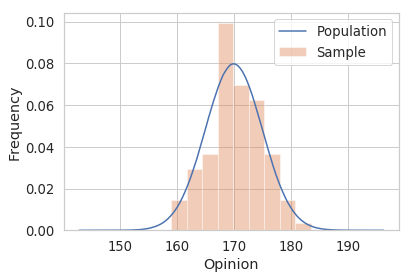

In [5]:
sns.distplot(population,kde=True,label="Population",norm_hist=True,hist=False)
sns.distplot(sample,kde=False,label="Sample",norm_hist=True)

plt.xlabel("Opinion")
plt.ylabel("Frequency")
plt.legend()

### We _always_ want to calculate the coefficients for the population, not for the sample. 
- We calculate the estimate for the sample + confidence Intervals
- Confidence intervals can be calculated numerically, or more robustly using bootstrapping
    - We have our sample (n values)
    - Do 10000 times: 
        - Take n values from the sample (with replacement)
        - Calculate the mean (or std)
    - Take the percentiles 2.5 and 97.5 of those 10000 values -> Those are your confidence intervals 
- Drawback of bootstrapping: It can be slow to get all those samples

Visualization: http://www.lock5stat.com/StatKey/bootstrap_1_quant/bootstrap_1_quant.html

Based on the central limit theorem: http://mfviz.com/central-limit/

Important: seaborn confidence intervals are based on bootstrapping!

In [6]:
data

,2000,2001,2002
0,1,2,3
1,1,2,2


In [7]:
data["2000"]

KeyError: '2000'

In [6]:
import scikits.bootstrap as bootstrap

print(np.mean(sample),np.std(sample))

CIs = bootstrap.ci(sample, statfunction=np.mean,n_samples=10000)  
print('CI for mean with bootstrapping = ', CIs)

CIs = bootstrap.ci(sample, statfunction=np.median,n_samples=10000)  
print('CI for median with bootstrapping = ', CIs)

CIs = bootstrap.ci(sample, statfunction=np.std,n_samples=10000)  
print('CI for std with bootstrapping = ', CIs)

CIs = bootstrap.ci(sample, statfunction=inequality,n_samples=10000)  
print('CI for inequality (20/80) with bootstrapping = ', CIs)

CIs = bootstrap.ci(sample, statfunction=lambda x: inequality(x,0.9),n_samples=10000)  
print('CI for inequality (10/90) with bootstrapping = ', CIs)

CIs = bootstrap.ci(sample, statfunction=lambda x: inequality(x,0.99),n_samples=10000)   
print('CI for inequality (1/99) with bootstrapping = ', CIs)

170.40682592208407 4.785615754274483
CI for mean with bootstrapping =  [169.47428426 171.3379853 ]
CI for median with bootstrapping =  [168.7279423  171.72595112]
CI for std with bootstrapping =  [4.23421062 5.49849134]
CI for inequality (20/80) with bootstrapping =  [0.26071601 0.26486425]
CI for inequality (10/90) with bootstrapping =  [0.1163489 0.1187824]
CI for inequality (1/99) with bootstrapping =  [0.01071555 0.01099165]


/home/jgarcia1/.local/lib/python3.5/site-packages/scikits/bootstrap/bootstrap.py:200: InstabilityWarning: Some values used extremal samples; results are probably unstable.
  warnings.warn("Some values used extremal samples; results are probably unstable.", InstabilityWarning)


## 1.1 Non-Representative samples because of undersampling)
- The sample may not be representative if you only study a handful of people (psychology, ehem...)
- The sample may not be representative if the distribution of the population is highly skewed (it's very unlikely that you select Bill Gates)

In [7]:
population = np.random.lognormal(mean=1,sigma=2,size=16000000)

_ = print_statistics(population)

Mean: 20.08
Median: 2.72
STD: 141.91
Inequality: Top 20%/80%: 7.111
Inequality: Top 10%/90%: 3.234
Inequality: Top 1%/99%: 0.593


In [8]:
sample = np.random.choice(population,size=385,replace=False)

_ = print_statistics(sample)

Mean: 16.84
Median: 2.99
STD: 55.95
Inequality: Top 20%/80%: 5.455
Inequality: Top 10%/90%: 2.477
Inequality: Top 1%/99%: 0.387


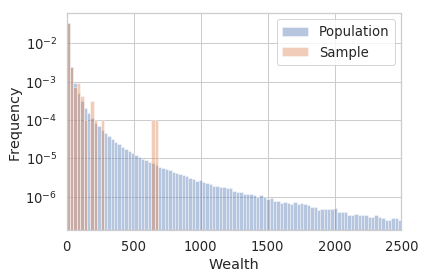

In [9]:
sns.distplot(population,kde=False,label="Population",norm_hist=True,bins=np.linspace(0,2500,100))
sns.distplot(sample,kde=False,label="Sample",norm_hist=True,bins=np.linspace(0,2500,100))

plt.xlabel("Wealth")
plt.ylabel("Frequency")
plt.xlim(0,2500)
plt.yscale("log")
plt.legend()

In [10]:
CIs = bootstrap.ci(sample, statfunction=np.mean,n_samples=100000)  
print('CI for mean with bootstrapping = ', CIs)
CIs = bootstrap.ci(sample, statfunction=np.median,n_samples=100000)  
print('CI for median with bootstrapping = ', CIs)
CIs = bootstrap.ci(sample, statfunction=np.std,n_samples=100000)  
print('CI for std with bootstrapping = ', CIs)
CIs = bootstrap.ci(sample, statfunction=inequality,n_samples=100000)  
print('CI for inequality (20/80) with bootstrapping = ', CIs)
CIs = bootstrap.ci(sample, statfunction=lambda x: inequality(x,0.9),n_samples=100000)  
print('CI for inequality (10/90) with bootstrapping = ', CIs)
CIs = bootstrap.ci(sample, statfunction=lambda x: inequality(x,0.99),n_samples=100000)   
print('CI for inequality (1/99) with bootstrapping = ', CIs)

CI for mean with bootstrapping =  [12.70585838 24.98682087]
CI for median with bootstrapping =  [2.29382664 3.88078995]
CI for std with bootstrapping =  [31.77962114 92.38823398]
CI for inequality (20/80) with bootstrapping =  [4.02168571 8.48600069]
CI for inequality (10/90) with bootstrapping =  [1.78198771 3.98662746]
CI for inequality (1/99) with bootstrapping =  [0.20377923 0.66505953]


# 2. Missing data
- Even if you have a nice representative sample you may have missing data
- Let's imagine we have a data of a survey, with age, income, education, political ideas, location, and if you will vote for Trump or Hillary.

## 2.1 Missing data mechanisms
We may have some missing values. Missing data mechanisms:
- 2.1.1 MCAR (missing completely at random), which means that we have a representative sample. 
    - OK
    - Missing value (y) neither depends on x (another variable) nor y
    - This for example could happen if during the survey collection there were some IT problems.
    - It is usually a **strong assumption** but it is usually made without consideration.
    - However imagine if young/rich/religious people are less likely to answer --> Then your data is MAR.
    - Usually in surveys you make sure you ask to a percentage of people of age and location that correspond with the real population. But you may be missing an important variable (for example US pollsters didn't ask for a representative sample in terms of education). 
    - We can either ignore the rows or impute the values based on people that did answer. 


- 2.1.2 MAR (missing at random), which means that we don't have a representative sample, but we can use another column to `impute` missing values. 
    - OK
    - Missing value (y) depends on x, but not y
    - Young/rich/religious people (x) may be less likely to answer about their voting preference (y)
    - We can correct the data by using other people that did answer. For instance, two people living in the same area, with the same age, income, education and political ideas are likely to vote similar, so if you only know how one of them intends to vote you can say that the other one will vote the same (there are methods for this, don't do it by hand!)
    - This is usually okay unless you have a weird distribution
 
- 2.1.3 MNAR (missing not at random), which means that we don't have a representative sample, and imputation is very very hard. This can happen for example if Trump voters are less likely to open the door, then they are not even in your sample.
    - Problem
    - The probability of a missing value (y) depends on the variable that is missing (y)
    - Trump voters (y) are less likely to answer about their voting preference (y)
    - We are in trouble and the methods to correct for this are way beyond the scope of the class (e.g. Heckman correction)
    - Impossible to verify unless you have some other dataset
    - Less of a problem if your missing variable (y) is correlated to some other variables (e.g. income, education, etc)
    
- Careful: Different variables can have different mechanism of missingness. Always ask yourself what could be causing the missingness.


## 2.2 Correcting for missing data
- 2.2.1 Ignore those values (only if your data is MCAR): Listwise Deletion (Complete Case Analysis)
- Impute those values (always better but more complicated)
    - 2.2.2 Single imputation: Problem: Usually reduces the variance or affects the correlation between variables
        - 2.2.2.1 Use the mean/median/mode as the value (only works "okayish" in MCAR)
        - 2.2.2.2 Use the mean/median/mode of the group as the value 
        - 2.2.2.3 Regression estimate or random forest (missForest)
        - 2.2.2.4 Use similar values (KNN in fancyimpute)
    - 2.2.3 Multiple imputation by chained equations (MICE): Similar to bootstrapping)

### Why do we care about missing values?
- To minimize biases and maximize the information available --> Find good estimates of our parameters


## We are going to be using a very bad distribution (extreme case, when we have more problems)

In [11]:
#Read our dataframe on wealth and income
population = read_data_ineq(N=1000000)

#Convert to a dataframe
population = pd.DataFrame(population,columns=["Wealth","Income"])

#Add random noise to income and wealth
population["Income"] = population["Income"] + 0.5*np.random.normal(0,(10**4.2+np.abs(population["Income"])))
population["Wealth"] = population["Wealth"] + 0.5*np.random.normal(0,(1E5+np.abs(population["Wealth"])))

population = population.loc[population["Wealth"]>1]
population = population.loc[population["Income"]>1]

#Print correlation
from scipy.stats import pearsonr
print("Correlation: ",pearsonr(population["Income"],population["Wealth"])[0])

population.head()

Correlation:  0.8236708300079882


,Wealth,Income
5,51125.703796,10398.549122
10,85681.116585,548.062870
13,12972.417880,11325.163815
15,37502.160016,4445.549757
17,63650.357947,7162.250468


Text(0, 0.5, 'Frequency')

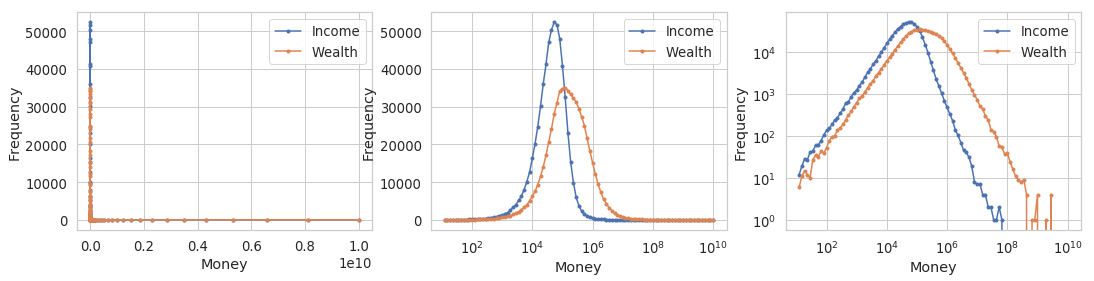

In [12]:
plt.figure(figsize=(18,4))
plt.subplot(131)
#For simplicity, get only the 40% of the population with no debts


values_i,bins = np.histogram(population["Income"],bins=np.logspace(1,10,100))
values_w,bins = np.histogram(population["Wealth"],bins=np.logspace(1,10,100))

plt.plot(bins[1:],values_i,".-",label="Income")
plt.plot(bins[1:],values_w,".-",label="Wealth")
plt.legend()
plt.xlabel("Money")
plt.ylabel("Frequency")


plt.subplot(132)
#Log scale in x-axis -> Should look normally distributed if the distribution is lognormal
plt.plot(bins[1:],values_i,".-",label="Income")
plt.plot(bins[1:],values_w,".-",label="Wealth")
plt.xscale("log")
plt.legend()
plt.xlabel("Money")
plt.ylabel("Frequency")


plt.subplot(133)
#Log-log scale > Should have a straight queue if the distribution is a power-law
plt.plot(bins[1:],values_i,".-",label="Income")
plt.plot(bins[1:],values_w,".-",label="Wealth")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xlabel("Money")
plt.ylabel("Frequency")

### Step 2: Get a sample

In [13]:
_ = print_statistics(population["Wealth"])

Mean: 483820.59
Median: 130500.43
STD: 7790777.57
Inequality: Top 20%/80%: 3.683
Inequality: Top 10%/90%: 1.923
Inequality: Top 1%/99%: 0.528


In [14]:
sample = population.sample(n=385)
_ = print_statistics(sample["Wealth"])

Mean: 381457.25
Median: 115393.46
STD: 805214.85
Inequality: Top 20%/80%: 2.895
Inequality: Top 10%/90%: 1.381
Inequality: Top 1%/99%: 0.194


In [15]:
sample = population.sample(n=100)
sample = sample.sort_values(by="Wealth")

_ = print_statistics(sample["Wealth"])

Mean: 370772.43
Median: 147284.74
STD: 962763.26
Inequality: Top 20%/80%: 2.327
Inequality: Top 10%/90%: 1.135
Inequality: Top 1%/99%: 0.333


## 2.1 Missing data mechanisms

### 2.1.1 MCAR data
- Make wealth missing randomly

In [16]:
sample["Wealth_MCAR"] = sample["Wealth"].copy()
#Add 20% of missing values
sample.loc[np.random.random(len(sample))<0.2,"Wealth_MCAR"] = np.NaN
_ = print_statistics(sample["Wealth_MCAR"].dropna())

Mean: 267597.87
Median: 136013.14
STD: 358712.54
Inequality: Top 20%/80%: 1.666
Inequality: Top 10%/90%: 0.701
Inequality: Top 1%/99%: 0.123


### 2.1.2 MAR data
- Make wealth missing when income is high

In [17]:
sample["Wealth_MAR"] = sample["Wealth"].copy()
#Add 20% of missing values
p=np.percentile(sample["Income"],60)
sample.loc[(sample["Income"] > p)&(np.random.random(len(sample))<0.5),"Wealth_MAR"] = np.NaN
_ = print_statistics(sample["Wealth_MAR"].dropna())

Mean: 220762.95
Median: 103016.48
STD: 339643.41
Inequality: Top 20%/80%: 1.875
Inequality: Top 10%/90%: 0.899
Inequality: Top 1%/99%: 0.165


### 2.1.3 MNAR data
- Make wealth missing when wealth is high
- Good news: Imputation possible since income is correlated

In [18]:
sample["Wealth_MNAR"] = sample["Wealth"].copy()
#Add 20% of missing values
p=np.percentile(sample["Wealth"],60)
sample.loc[(sample["Wealth"] > p)&(np.random.random(len(sample))<0.5),"Wealth_MNAR"] = np.NaN
_ = print_statistics(sample["Wealth_MNAR"].dropna())

Mean: 218691.56
Median: 100167.27
STD: 287750.64
Inequality: Top 20%/80%: 2.061
Inequality: Top 10%/90%: 0.924
Inequality: Top 1%/99%: 0.076


### 2.1.3 MNAR data 2 (Non-representative sample due to problems with the design)
- Make **observation** (person) missing when wealth is high
- Bad news: Impossible to verify unless you have some kind of aggregated data

In [19]:
N = len(population)
p = np.zeros(N)
p[:int(0.1*N)] = 0.01
p[int(0.1*N):int(0.25*N)] = 0.1
p[int(0.25*N):int(0.75*N)] = 0.2
p[int(0.75*N):int(0.9*N)] = 0.1
p[int(0.9*N):] = 0.01

sample_mncar2 = population.sample(n=100000,weights=p)
_ = print_statistics(sample_mncar2["Wealth"])

Mean: 223443.91
Median: 132048.84
STD: 943466.89
Inequality: Top 20%/80%: 1.397
Inequality: Top 10%/90%: 0.691
Inequality: Top 1%/99%: 0.154


## 2.1 Types of missing data
Summary

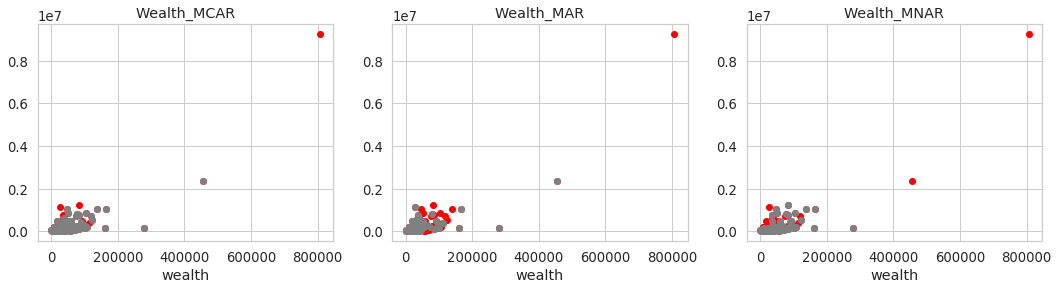

In [20]:
plt.figure(figsize=(18,4))

labels = ["Wealth",'Wealth_MCAR', 'Wealth_MAR', 'Wealth_MNAR']
i = 0
for col in labels[1:]:
    i+=1
    plt.subplot(1,3,i)
    plt.plot(sample["Income"],sample["Wealth"],"o",color="red")
    plt.plot(sample["Income"],sample[col],"o",color="gray")
    plt.title(col)
    
    plt.xlabel("income")
    plt.xlabel("wealth")
    
#     plt.xscale("log")
#     plt.yscale("log")

## Visualize missing data

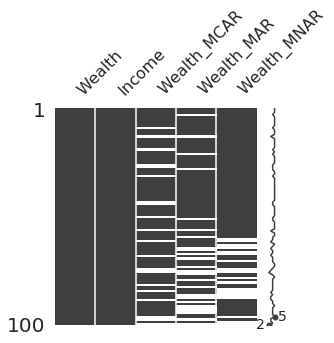

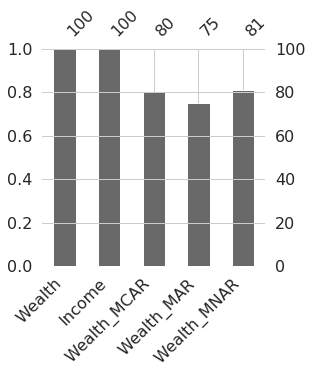

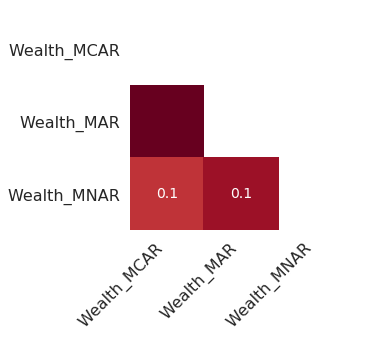

In [21]:
import missingno as msno

msno.matrix(sample,figsize=(4,4))

msno.bar(sample,figsize=(4,4))

msno.heatmap(sample,figsize=(4,4))

## 2.2 Correcting for missing data
- 2.2.1 Ignore those values (only if your data is MCAR): Listwise Deletion (Complete Case Analysis)
- Impute those values (always better but more complicated)
    - 2.2.2 Single imputation: Problem: Usually reduces the variance or affects the correlation between variables
        - 2.2.2.1 Use the mean/median/mode as the value (only works "okayish" in MCAR)
        - 2.2.2.2 Use the mean/median/mode of the group as the value 
        - 2.2.2.3 Regression estimate or random forest (missForest)
        - 2.2.2.4 Use similar values (KNN in fancyimpute)
    - 2.2.3 Multiple imputation by chained equations (MICE): Similar to bootstrapping)

### 2.2.1 List-wise deletion (ignoring the values)
- Only okay if the data is MCAR
- Reduces the amount of information available

In [22]:
labels = ['Wealth_MCAR', 'Wealth_MAR', 'Wealth_MNAR']
print("- {}: ${:2.0f}k".format("Original wealth",(sample["Wealth"]).mean()/1000))

for col in labels:
    data = sample.dropna(subset=[col])
    print("{}: ${:2.0f}k".format(col,(data[col]).mean()/1000))


- Original wealth: $371k
Wealth_MCAR: $268k
Wealth_MAR: $221k
Wealth_MNAR: $219k


### 2.2.2.1 Single imputation: Use the mean/median/mode as the value
- Reduces the variance
- Modifies the correlation
- You could add some noise to fix the variance, but the correlation would still be bad
- 2.2.2.2 Use the mean/median/mode of the group as the value (if we have for example data by city, we can do the imputation at the ctiy level)

- Original wealth: $371k
Wealth_MCAR (mean): $268k
Wealth_MAR (mean): $221k
Wealth_MNAR (mean): $219k


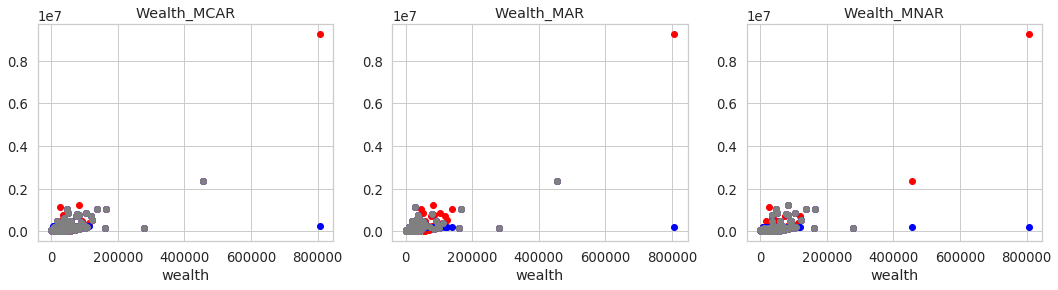

In [23]:
sample_mean = sample.fillna(sample.mean())
plt.figure(figsize=(18,4))

print("- {}: ${:2.0f}k".format("Original wealth",(sample["Wealth"]).mean()/1000))

labels = ["Wealth",'Wealth_MCAR', 'Wealth_MAR', 'Wealth_MNAR']
i = 0
for col in labels[1:]:
    i+=1
    plt.subplot(1,3,i)
    plt.plot(sample["Income"],sample["Wealth"],"o",color="red")
    plt.plot(sample_mean["Income"],sample_mean[col],"o",color="blue")
    plt.plot(sample["Income"],sample[col],"o",color="gray")
    plt.title(col)
    
    print("{} (mean): ${:2.0f}k".format(col,(sample_mean[col]).mean()/1000))
    
    plt.xlabel("income")
    plt.xlabel("wealth")
    
#     plt.xscale("log")
#     plt.yscale("log")

### 2.2.2.3 Regression estimate or random forest (missForest)
- Better, but still too optimistic and we do not know the uncertainty of our results
- Fails for outliers

In [24]:
#already installed,otherwise uncomment the line below
#!conda install --yes -c r rpy2  


import rpy2 
%load_ext rpy2.ipython
%R require("missForest")

/opt/anaconda/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Loading required package: missForest

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Loading required package: randomForest

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: randomForest 4.6-14

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Type rfNews() to see new features/changes/bug fixes.

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Loading required package: foreach

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Loading required pac

array([1], dtype=int32)

In [25]:
#Don't worry about this
sample["c"] = np.random.randn(100)
sample.head()

,Wealth,Income,Wealth_MCAR,Wealth_MAR,Wealth_MNAR,c
503996,381.212937,22042.489561,381.212937,381.212937,381.212937,0.598400
130015,2552.694129,15879.249758,2552.694129,2552.694129,2552.694129,0.586139
245793,3627.437847,34765.187693,3627.437847,3627.437847,3627.437847,0.796789
947345,4247.932559,58161.576367,4247.932559,NaN,4247.932559,0.112660
555458,8542.148279,39496.422839,8542.148279,8542.148279,8542.148279,-1.711131


In [26]:
%%R -o sample_forest -i sample

sample[,c("c","Wealth_MCAR","Income")] <- missForest(sample[,c("c","Wealth_MCAR","Income")])$ximp
sample[,c("c","Wealth_MAR","Income")] <- missForest(sample[,c("c","Wealth_MAR","Income")])$ximp
sample[,c("c","Wealth_MNAR","Income")] <- missForest(sample[,c("c","Wealth_MNAR","Income")])$ximp

sample_forest <- sample

/opt/anaconda/anaconda3/lib/python3.5/site-packages/rpy2/robjects/pandas2ri.py:190: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


  missForest iteration 1 in progress...done!
  missForest iteration 2 in progress...done!
  missForest iteration 3 in progress...done!
  missForest iteration 1 in progress...done!
  missForest iteration 2 in progress...done!
  missForest iteration 3 in progress...done!
  missForest iteration 4 in progress...done!
  missForest iteration 5 in progress...done!
  missForest iteration 1 in progress...done!
  missForest iteration 2 in progress...done!
  missForest iteration 3 in progress...done!


- Original wealth: $371k
Wealth_MCAR (mean): $268k
Wealth_MAR (mean): $253k
Wealth_MNAR (mean): $233k


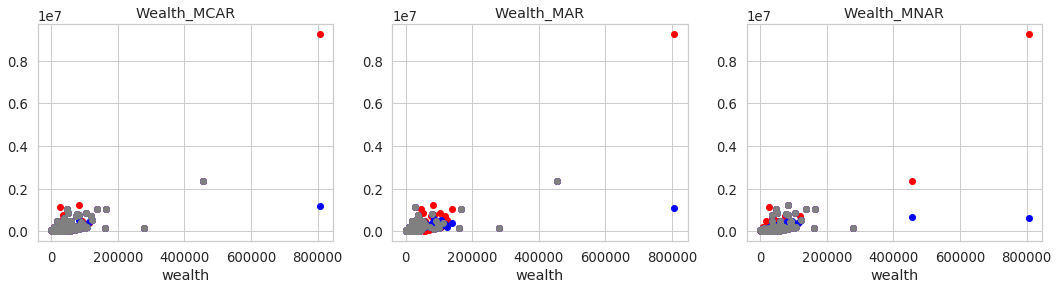

In [27]:
plt.figure(figsize=(18,4))

print("- {}: ${:2.0f}k".format("Original wealth",(sample["Wealth"]).mean()/1000))

labels = ["Wealth",'Wealth_MCAR', 'Wealth_MAR', 'Wealth_MNAR']
i = 0
for col in labels[1:]:
    i+=1
    plt.subplot(1,3,i)
    plt.plot(sample["Income"],sample["Wealth"],"o",color="red")
    plt.plot(sample_forest["Income"],sample_forest[col],"o",color="blue")
    plt.plot(sample["Income"],sample[col],"o",color="gray")
    plt.title(col)
    
    print("{} (mean): ${:2.0f}k".format(col,(sample_forest[col]).mean()/1000))
    
    plt.xlabel("income")
    plt.xlabel("wealth")
    
#     plt.xscale("log")
#     plt.yscale("log")

### 2.2.2.4 Use similar values (KNN in fancyimpute)
- Also good, but it is difficult to define what "similar" is
- Fails for outliers

/opt/anaconda/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/anaconda/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.
/opt/anaconda/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


(80, 6)
Imputing row 1/100 with 0 missing, elapsed time: 0.003
(75, 6)
Imputing row 1/100 with 0 missing, elapsed time: 0.003
(81, 6)
Imputing row 1/100 with 0 missing, elapsed time: 0.003
- Original wealth: $371k
Wealth_MCAR (mean): $267k
Wealth_MAR (mean): $262k
Wealth_MNAR (mean): $230k


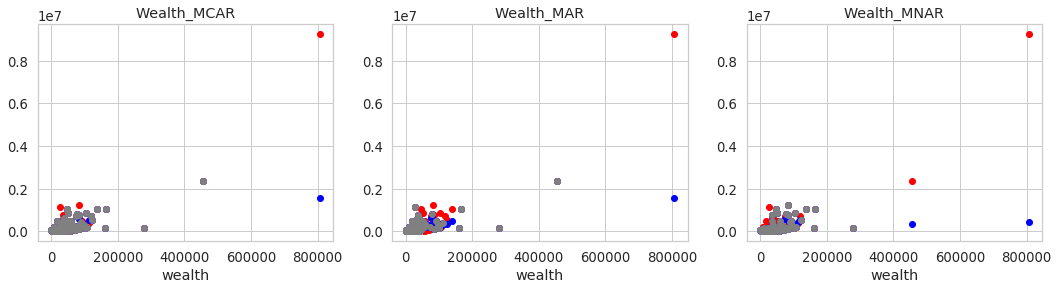

In [28]:
from fancyimpute import KNN
sample_knn = sample.copy()

for label in ['Wealth_MCAR', 'Wealth_MAR', 'Wealth_MNAR']:
    print(sample_knn.dropna(subset=[label]).shape)
    sample_knn.loc[:,[label,"Income"]] = KNN(k=3).fit_transform(sample_knn.loc[:,[label,"Income"]])

plt.figure(figsize=(18,4))

print("- {}: ${:2.0f}k".format("Original wealth",(sample["Wealth"]).mean()/1000))

labels = ["Wealth",'Wealth_MCAR', 'Wealth_MAR', 'Wealth_MNAR']
i = 0
for col in labels[1:]:
    i+=1
    plt.subplot(1,3,i)
    plt.plot(sample["Income"],sample["Wealth"],"o",color="red")
    plt.plot(sample_knn["Income"],sample_knn[col],"o",color="blue")
    plt.plot(sample["Income"],sample[col],"o",color="gray")
    plt.title(col)
    
    print("{} (mean): ${:2.0f}k".format(col,(sample_knn[col]).mean()/1000))
    
    plt.xlabel("income")
    plt.xlabel("wealth")
    
#     plt.xscale("log")
#     plt.yscale("log")

### 2.2.3 Multiple imputation by chained equations (MICE): Similar to bootstrapping)
- Impute many times the data with different models
- Analyze the imputed data
- Use it to calculate confidence intervals


####  We can use MICE (or IterativeImputer) from fancyimputem
- Calculate many samples and do it by hand

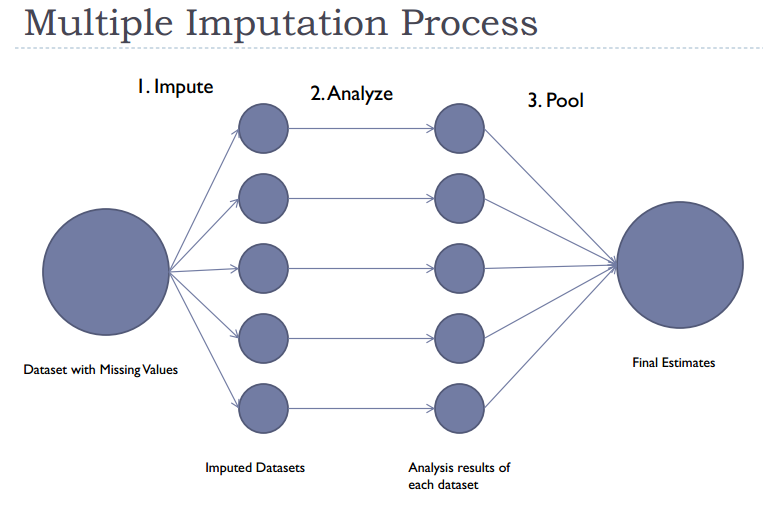

In [29]:
Image("images/mi.png")

- Original wealth: $371k
Wealth_MCAR (mean): $[265.379  313.6562]k
Wealth_MAR (mean): $[256.2799 304.1973]k
Wealth_MNAR (mean): $[230.9307 279.3841]k


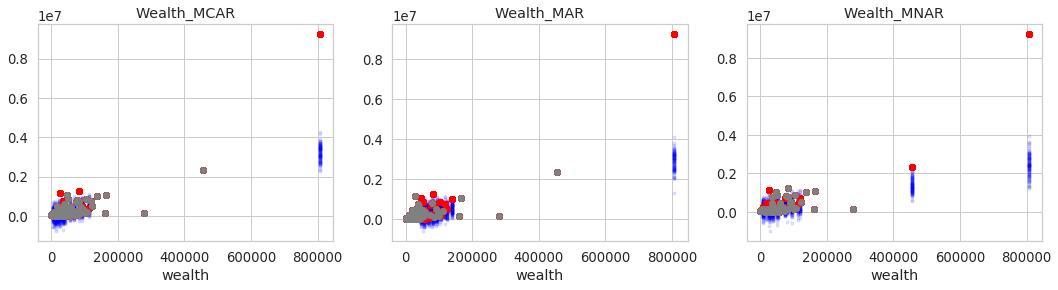

In [30]:
from fancyimpute import IterativeImputer
import statsmodels.formula.api as smf

sample_mice = sample.copy()
i = 0
plt.figure(figsize=(18,4))

print("- {}: ${:2.0f}k".format("Original wealth",(sample["Wealth"]).mean()/1000))

d = dict()
d2 = dict()
d3 = dict()


for label in ['Wealth_MCAR', 'Wealth_MAR', 'Wealth_MNAR']:
    val = []
    val2 = []
    val3 = []
    col = label
    i+=1
    plt.subplot(1,3,i)
    for j in range(100):
        sample_mice = sample.copy()
        sample_mice.loc[:,[label,"Income"]] = IterativeImputer(n_iter=10, sample_posterior=True, random_state=j).fit_transform(sample_mice.loc[:,[label,"Income"]].values)

        plt.plot(sample["Income"],sample["Wealth"],"o",color="red")
        
        plt.plot(sample_mice["Income"],sample_mice[col],".",color="blue",alpha=0.1)
        plt.plot(sample["Income"],sample[col],"o",color="gray")
        plt.title(col)
        
        val.append(sample_mice[col].mean())
        val2.append(inequality(sample_mice[col],f=.9))
        val3.append(smf.ols("{}~Income".format(label),data=sample_mice).fit().params[1])
    


      
    val = (np.array(val))
    val2 = (np.array(val2))
    val3 = (np.array(val3))
    
    
    d[label] = np.percentile(val,[2.5,97.5])
    d2[label] = np.percentile(val2,[2.5,97.5])
    d3[label] = np.percentile(val3,[2.5,97.5])
    
    print("{} (mean): ${}k".format(label,np.round(d[label],1)/1000))
    
    
    plt.xlabel("income")
    plt.xlabel("wealth")
    
#     plt.xscale("log")
#     plt.yscale("log")

####  We can use MICE from statsmodels
- For a regression

In [31]:
import statsmodels.formula.api as smf
from statsmodels.imputation import mice
import statsmodels.api as sm

imp = mice.MICEData(sample)

reg = smf.ols("Wealth~Income",data=sample).fit()

def boot_mean(values):
    return np.round(bootstrap.ci(values, statfunction=np.mean,n_samples=10000),0)
def boot_ineq(values):
    return np.round(bootstrap.ci(values, statfunction=lambda x: inequality(x,f=.9),n_samples=10000),2)

print("Truth: ", np.round(reg.params[1],2), 
      " Mean (BS): ${:2.0f}k".format((sample["Wealth"]).mean()/1000),
      " Ineq 10/90 (BS): {:2.2f}".format(inequality((sample["Wealth"]),f=.9)))
print()


for col in ["Wealth_MCAR","Wealth_MAR","Wealth_MNAR"]:
    labels = ["dropna","mean","forest","knn","mice statsmodels", "mice fancyimpute"]
    
    print(col)
    data = sample.dropna(subset=[col])
    reg = smf.ols("{}~Income".format(col),data=data).fit()
   
    print(labels.pop(0), np.round(reg.conf_int().loc["Income"].values,2), 
      " Mean (BS): ${}k".format(boot_mean(data[col]/1000)),
      " Ineq 10/90 (BS): {}".format(boot_ineq(data[col]),f=.9))
          
    
    for data in [sample_mean,sample_forest,sample_knn]:
        #The regression using the sample

        reg = smf.ols("{}~Income".format(col),data=data).fit()
        print(labels.pop(0), np.round(reg.conf_int().loc["Income"].values,2), 
      " Mean (BS): ${}k".format(boot_mean(data[col]/1000)),
      " Ineq 10/90 (BS): {}".format(boot_ineq(data[col]),f=.9))
        
    
    results = mice.MICE('{} ~ Income'.format(col), sm.OLS, imp).fit(10, 10)
    print(labels.pop(0), np.round(results.conf_int()[1],2))
    print(labels.pop(0),np.round(d3[col],2), " Mean: ${}k".format(np.round(d[col]/1000,0)),
      " Ineq 10/90: {}".format(np.round(d2[col],2)))
    print()

/opt/anaconda/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Truth:  8.9  Mean (BS): $371k  Ineq 10/90 (BS): 1.13

Wealth_MCAR
dropna [3.12 4.9 ]  Mean (BS): $[207. 374.]k  Ineq 10/90 (BS): [0.52 1.15]


/home/jgarcia1/.local/lib/python3.5/site-packages/scikits/bootstrap/bootstrap.py:202: InstabilityWarning: Some values used top 10 low/high samples; results may be unstable.
  warnings.warn("Some values used top 10 low/high samples; results may be unstable.", InstabilityWarning)


mean [0.82 2.05]  Mean (BS): $[217. 353.]k  Ineq 10/90 (BS): [0.49 1.04]
forest [1.76 2.86]  Mean (BS): $[212. 352.]k  Ineq 10/90 (BS): [0.53 1.02]
knn [2.09 3.15]  Mean (BS): $[210. 356.]k  Ineq 10/90 (BS): [0.55 1.08]


/opt/anaconda/anaconda3/lib/python3.5/site-packages/statsmodels/imputation/mice.py:1081: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ix = dxi[[jj, ir]]
/opt/anaconda/anaconda3/lib/python3.5/site-packages/statsmodels/imputation/mice.py:1082: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  iz = ixm[[jj, ix]]


mice statsmodels [1.19 2.65]
mice fancyimpute [3.34 4.53]  Mean: $[265. 314.]k  Ineq 10/90: [0.69 0.95]

Wealth_MAR
dropna [2.82 4.6 ]  Mean (BS): $[163. 332.]k  Ineq 10/90 (BS): [0.63 1.63]
mean [0.68 1.82]  Mean (BS): $[178. 304.]k  Ineq 10/90 (BS): [0.47 1.17]
forest [1.51 2.55]  Mean (BS): $[205. 338.]k  Ineq 10/90 (BS): [0.44 1.01]
knn [1.95 2.96]  Mean (BS): $[211. 349.]k  Ineq 10/90 (BS): [0.47 1.05]
mice statsmodels [0.8  2.29]
mice fancyimpute [2.91 4.22]  Mean: $[256. 304.]k  Ineq 10/90: [0.67 0.86]

Wealth_MNAR
dropna [1.77 4.33]  Mean (BS): $[165. 293.]k  Ineq 10/90 (BS): [0.74 1.3 ]
mean [0.   1.07]  Mean (BS): $[176. 281.]k  Ineq 10/90 (BS): [0.59 0.93]
forest [0.61 1.67]  Mean (BS): $[186. 294.]k  Ineq 10/90 (BS): [0.54 0.85]
knn [0.29 1.42]  Mean (BS): $[181. 294.]k  Ineq 10/90 (BS): [0.57 0.94]
mice statsmodels [0.22 1.79]
mice fancyimpute [2.09 4.03]  Mean: $[231. 279.]k  Ineq 10/90: [0.7  1.02]



## Important: Make sure you have missing values instead of "-9" or other strings in your file
- The way to do it is to explore the file and then read it:

pd.read_csv(filename,...,na_values=[`here the list of missing values`]

# 3. Dealing with outliers
In short:
- If the outlier is *obviously wrong* you should treat it as missing data. For instance if you record a value of 19 in a 0-10 scale (it was problably 1 or 9, but we don't know).
- If the outlier is *not obviously wrong", you should keep it. For instance if most people say 3 in a 0-10 scale but a couple say 9, then you need to keep it. You can use `robust` statistics, that are not so affected by outliers. 

See outliers: --> Distributions and pairplots


Read this:
http://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/

# --- Example of code

### Read data

In [32]:
#Inclass exercises
df = pd.read_csv("data/impute_example.csv",sep="\t")
df = df.loc[df["Metropolitan areas"]!="Italy"]
df.head()

,C,METRO_ID,Metropolitan areas,LABOUR_PRODUCTIVITY,UNEMP_R,GDP_PC
0,IT,IT001,Rome,1.246225,1.153054,1.263583
1,IT,IT001,Rome,1.263464,1.041401,1.292440
2,IT,IT001,Rome,1.244960,0.827486,1.302868
3,IT,IT001,Rome,1.227114,0.837920,1.285412
4,IT,IT001,Rome,1.241025,0.779485,1.325299


### Visualize missing data

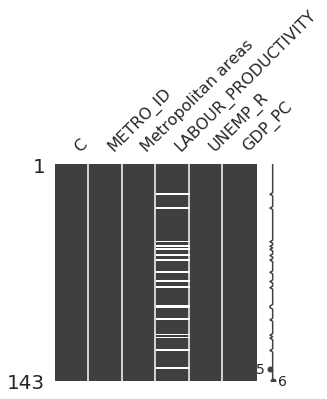

In [33]:
import missingno as msno

msno.matrix(df,figsize=(4,4))

### Find confidence intervals

In [34]:
#Find the confidence intervals of each variable (don't pass missing values!)
import scikits.bootstrap as bootstrap

for column in ["LABOUR_PRODUCTIVITY","UNEMP_R","GDP_PC"]:
    CIs = bootstrap.ci(df[column].dropna(), statfunction=np.mean,n_samples=10000)  
    print(column,CIs)



LABOUR_PRODUCTIVITY [0.9868698  1.04374396]
UNEMP_R [0.90827926 1.12751379]
GDP_PC [0.95550917 1.05536456]


### Impute using KNN (K-nearest neighbors)
- Disadvantage: Using categorical variables is hard

In [35]:
from fancyimpute import KNN
def knn_impute(data,variables,categorical_var=None,k=5):
    sample = data.copy()
    if categorical_var is None:
        sample[variables] = KNN(k=k).fit_transform(sample[variables])
        return data
    else:
        df_knns = []
        for g,sample_g in sample.groupby(categorical_var):
            try:
                sample_g[variables] = KNN(k=k).fit_transform(sample_g[variables])
            except:
                print(g, " not missing any")
            df_knns.append(sample_g)

        return pd.concat(df_knns)

In [36]:
df_filled = knn_impute(df,["LABOUR_PRODUCTIVITY","UNEMP_R","GDP_PC"])
CIs = bootstrap.ci(df_filled["LABOUR_PRODUCTIVITY"].dropna(), statfunction=np.mean,n_samples=10000)  
print("Mean of Labour productivity",np.mean(df_filled["LABOUR_PRODUCTIVITY"]))
print(CIs)


Imputing row 1/143 with 0 missing, elapsed time: 0.004
Imputing row 101/143 with 0 missing, elapsed time: 0.004
Mean of Labour productivity 1.0150968358458483
[0.9872226  1.04370405]


### Impute using missForest
- Disadvantage: Calling R from Python makes the code a bit harder

In [37]:
#Complete with missForest (uses python)

#already installed,otherwise uncomment the line below
#!conda install --yes -c r rpy2  
import rpy2 
%load_ext rpy2.ipython
%R require("missForest")

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


array([1], dtype=int32)

In [38]:
%%R -o df_forest -i df

#Convert categorical variables to factors (if we have categorical variables)
df[,c("Metropolitan.areas")] <- factor(df[,c("Metropolitan.areas")])

#impute
imp <- missForest(df[,c("Metropolitan.areas","LABOUR_PRODUCTIVITY","UNEMP_R","GDP_PC")],variablewise=TRUE)

#copy the df
df_forest = df
df_forest[,c("Metropolitan.areas","LABOUR_PRODUCTIVITY","UNEMP_R","GDP_PC")] = imp$ximp

#print error rates
print(imp$OOBerror)

/opt/anaconda/anaconda3/lib/python3.5/site-packages/rpy2/robjects/pandas2ri.py:190: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


  missForest iteration 1 in progress...done!
  missForest iteration 2 in progress...done!
  missForest iteration 3 in progress...done!
  missForest iteration 4 in progress...done!
        PFC         MSE         MSE         MSE 
0.000000000 0.001067494 0.000000000 0.000000000 


In [39]:
CIs = bootstrap.ci(df_forest["LABOUR_PRODUCTIVITY"].dropna(), statfunction=np.mean,n_samples=10000)  
print("Mean of Labour productivity",np.mean(df_forest["LABOUR_PRODUCTIVITY"]))
print(CIs)

Mean of Labour productivity 1.00732227059239
[0.98114051 1.03366501]


### Impute using Multiple imputation
- Disadvantage: Needs a function to aggregate the results

In [40]:
from fancyimpute import IterativeImputer
import statsmodels.formula.api as smf

def agg(data):
    #e.g. for the mean
    return [data["LABOUR_PRODUCTIVITY"].mean()]
    
#     #e.g. for the coefficient in the regression
#     return smf.ols("UNEMP_R~LABOUR_PRODUCTIVITY+GDP_PC"".format(label),data=sample_mice).fit().params


def mice_impute_agg(data,variables,function,repetitions=100):
    values = []
    for j in range(repetitions):
        sample = data.copy()
        sample[variables] = IterativeImputer(n_iter=10, sample_posterior=True, random_state=j).fit_transform(sample[variables])
        values.append(function(sample))
    values = np.array(values)
    return np.percentile(values,[2.5,97.5])


df_mean = mice_impute_agg(df,["LABOUR_PRODUCTIVITY","UNEMP_R","GDP_PC"],function=agg)
print("Mean of Labour productivity",df_mean)

Mean of Labour productivity [1.00479728 1.0109559 ]


### Regression using Multiple imputation
- You could also use bootstrapping using one of the other methods

In [42]:
from statsmodels.imputation import mice
import statsmodels.api as sm

#micedata doesn't like strings, so we keep a code for each city
df["ID"] = df["METRO_ID"].str[2:].astype(int)

imp = mice.MICEData(df[["UNEMP_R","LABOUR_PRODUCTIVITY","GDP_PC"]])
reg = mice.MICE('UNEMP_R ~ LABOUR_PRODUCTIVITY + GDP_PC', sm.OLS, imp).fit(10, 100)

#fmi =  fraction of missing information
print(reg.summary())

                               Results: MICE
Method:                       MICE            Sample size:             143 
Model:                        OLS             Scale                    0.09
Dependent variable:           UNEMP_R         Num. imputations         100 
---------------------------------------------------------------------------
                     Coef.  Std.Err.    t     P>|t|   [0.025  0.975]  FMI  
---------------------------------------------------------------------------
Intercept            0.6571   0.2547   2.5802 0.0099  0.1580  1.1562 0.0749
LABOUR_PRODUCTIVITY  4.1975   0.4683   8.9626 0.0000  3.2796  5.1154 0.0681
GDP_PC              -3.8500   0.2449 -15.7234 0.0000 -4.3299 -3.3701 0.0503



# Inclass exercise:
- Do the same for the other dataset

In [43]:
#Imports that you need
from fancyimpute import KNN,IterativeImputer
import scikits.bootstrap as bootstrap
from statsmodels.imputation import mice
import statsmodels.api as sm
import statsmodels.formula.api as smf

import rpy2 
%load_ext rpy2.ipython
%R require("missForest")

#For KNN imputation
def knn_impute(data,variables,categorical_var=None,k=5):
    sample = data.copy()
    if categorical_var is None:
        sample[variables] = KNN(k=k).fit_transform(sample[variables])
        return data
    else:
        df_knns = []
        for g,sample_g in sample.groupby(categorical_var):
            try:
                sample_g[variables] = KNN(k=k).fit_transform(sample_g[variables])
            except:
                print(g, " not missing any")
            df_knns.append(sample_g)

        return pd.concat(df_knns)
    
#For MICE imputation
def agg(data):
    #e.g. for the mean
    return data["LABOUR_PRODUCTIVITY"].mean()
    
#     #e.g. for the coefficient in the regression
#     return smf.ols("UNEMP_R~LABOUR_PRODUCTIVITY+GDP_PC"".format(label),data=sample_mice).fit().params[1]


def mice_impute_agg(data,variables,function,repetitions=100):
    values = []
    for j in range(repetitions):
        sample = data.copy()
        sample[variables] = IterativeImputer(n_iter=10, sample_posterior=True, random_state=j).fit_transform(sample[variables])
        values.append(function(sample))
    values = np.array(values)
    return np.percentile(values,[2.5,97.5])


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [44]:
#Read the data of Spain (DONE)
df = pd.read_csv("data/impute_example2.csv",sep="\t")
df = df.loc[df["Metropolitan areas"]!="Spain"]
df.head()

,C,METRO_ID,Metropolitan areas,LABOUR_PRODUCTIVITY,UNEMP_R,GDP_PC
0,ES,ES001,Madrid,1.274879,0.828585,1.253806
1,ES,ES001,Madrid,1.247902,0.541465,1.291793
2,ES,ES001,Madrid,NaN,0.521517,1.310934
3,ES,ES001,Madrid,1.220348,0.527929,1.330940
4,ES,ES001,Madrid,1.198935,0.481619,1.352922


In [45]:
#Impute using KNN (fancyimpute)
df_knn = 

SyntaxError: invalid syntax (<ipython-input-45-7ddb346aedf0>, line 2)

In [ ]:
#Impute using missForest

In [ ]:
%%R -o df_forest -i df

In [ ]:
#Merge df_knn and df_forest to see how the imputation worked, use the columns ["Metropolitan areas","UNEMP_R","GDP_PC"] 
#for the merging, those columns didn't have missing values so they will be the same for both
df_merged  = pd.merge(...,...,on=["Metropolitan areas","UNEMP_R","GDP_PC"])
df_merged.head()

In [ ]:
#Plot "LABOUR_PRODUCTIVITY_x" vs "LABOUR_PRODUCTIVITY_y"

In [ ]:
#Impute using MICE to calculate the maximum of "LABOUR_PRODUCTIVITY"

#Here is the aggregation function
def agg(data):
    return data["LABOUR_PRODUCTIVITY"].max()

In [ ]:
#Impute using MICE and create the regression

In [ ]:
https://docs.google.com/document/d/1rrenaYvukoYHNZAWDuRF4iYeHrqlDcqLa5GYb2dEc-I/edit